In [57]:
# Import the necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the scipy library for the pearsonr function, which will be used to calculate correlations
import scipy.stats as stats
from scipy.stats import pearsonr


# Enable inline plotting for Jupyter notebooks
%matplotlib inline

##### Combine multiple dataframes(datasets) into one


In [2]:
df1 = pd.read_csv('datasets/annual-working-hours-per-worker.csv')
df2 = pd.read_csv('datasets/gdp-per-capita-worldbank.csv')
df3 = pd.read_csv('datasets/life-expectancy.csv')
df4 = pd.read_csv('datasets/number-of-internet-users.csv')
df5 = pd.read_csv('datasets/population.csv')
df6 = pd.read_csv('datasets/share-with-mental-and-substance-disorders.csv')
df7 = pd.read_csv('datasets/suicide-death-rates_per_10k.csv')
df8 = pd.read_csv('datasets/unemployment-rate.csv')
df9 = pd.read_csv('datasets/optional/children-born-per-woman.csv')
df10 = pd.read_csv('datasets/optional/happiness-cantril-ladder.csv')
df11 = pd.read_csv('datasets/optional/prevalence-by-mental-and-substance-use-disorder.csv')
df12 = pd.read_csv('datasets/optional/prevalence-of-depression-males-vs-females.csv')
df13 = pd.read_csv('datasets/optional/share-of-individuals-using-the-internet.csv')
df14 = pd.read_csv('datasets/optional/share-with-depression.csv')
df15 = pd.read_csv('datasets/optional/mobile-cellular-subscriptions-per-100-people.csv')
df16 = pd.read_csv('datasets/optional/fixed-telephone-subscriptions-per-100-people.csv')

df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]


combined_df = df_list[0]

for i in range(1, len(df_list)):
    combined_df = pd.merge(combined_df, df_list[i], on=['Entity', 'Year', 'Code'])

df = combined_df

In [3]:
df

,Entity,Code,Year,Average annual working hours per worker,"GDP per capita, PPP (constant 2017 international $)",Life expectancy at birth (historical),Number of Internet users,Population (historical estimates)_x,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),...,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_x,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates)_y,Continent,Individuals using the Internet (% of population),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)_y,Mobile cellular subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people)
0,Argentina,ARG,2004,1730.8173,18032.611328,74.9,6201193,38668796,13.90,10.90,...,2.82,2.48,2.15,3.42,38668796.0,NaN,16.036684,2.82,35.104420,22.759462
1,Argentina,ARG,2005,1761.3994,19426.439453,75.1,6923521,39070504,13.90,10.72,...,2.82,2.46,2.14,3.43,39070504.0,NaN,17.720583,2.82,56.967747,24.276064
2,Argentina,ARG,2006,1765.6013,20777.652344,75.4,8261401,39476856,13.86,10.63,...,2.79,2.42,2.13,3.40,39476856.0,NaN,20.927202,2.79,80.199768,24.076923
3,Argentina,ARG,2007,1780.5565,22424.117188,75.0,10346509,39876116,13.76,10.94,...,2.73,2.38,2.09,3.32,39876116.0,NaN,25.946632,2.73,101.807961,23.938942
4,Argentina,ARG,2008,1781.4246,23103.457031,75.6,11322013,40273768,13.64,10.89,...,2.67,2.32,2.05,3.23,40273768.0,NaN,28.112623,2.67,116.039391,24.308369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Vietnam,VNM,2013,2267.4883,5815.175293,73.8,34753078,90267736,9.55,8.08,...,2.57,1.23,1.93,3.15,90267736.0,NaN,38.500000,2.57,136.343826,7.410619
774,Vietnam,VNM,2014,2150.6357,6098.539062,73.9,37406557,91235504,9.59,8.13,...,2.57,1.24,1.94,3.14,91235504.0,NaN,41.000000,2.57,148.448822,7.332948
775,Vietnam,VNM,2015,2169.5916,6438.259766,73.9,41486130,92191400,9.59,8.12,...,2.58,1.24,1.95,3.14,92191400.0,Asia,45.000000,2.58,129.831512,7.903731
776,Vietnam,VNM,2016,2169.5916,6767.778809,73.9,49357060,93126528,9.57,8.11,...,2.58,1.24,1.95,3.14,93126528.0,NaN,53.000000,2.58,128.790787,5.978206


##### Count the number of NaN values in each column

In [4]:
nan_counts = df.isnull().sum()

print(nan_counts)

Entity                                                                                 0
Code                                                                                   0
Year                                                                                   0
Average annual working hours per worker                                                0
GDP per capita, PPP (constant 2017 international $)                                    0
Life expectancy at birth (historical)                                                  0
Number of Internet users                                                               0
Population (historical estimates)_x                                                    0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)            0
Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)                    0
Fertility rate (Selec

In [5]:
continents = df['Continent'].nunique()
continents

6

##### Remove rows with missing values in the 'Continent' column

In [6]:
mask = df['Continent'].isnull()

cnt_nan_rows = df[mask]
cnt_nan_rows

df = df.drop('Continent', axis=1)

##### Check again the number of NaN values in each column 

In [7]:
nan_counts = df.isnull().sum()

print(nan_counts)

Entity                                                                               0
Code                                                                                 0
Year                                                                                 0
Average annual working hours per worker                                              0
GDP per capita, PPP (constant 2017 international $)                                  0
Life expectancy at birth (historical)                                                0
Number of Internet users                                                             0
Population (historical estimates)_x                                                  0
Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)          0
Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)                        0
Unemployment, total (% of total labor force) (modeled ILO estimate)                  0
Fertility rate (Select Gapminder, v12) (201

##### Rename the columns in the dataframe

In [8]:
short_column_names = ['Country', 'Code', 'Year', 'Avg annual hrs',
                      'GDP per capita (PPP)', 'Life expectancy', 'Num Internet users',
                      'Population', 'Mental disorders %',
                      'Self-harm deaths rate', 'Unemployment rate', 'Fertility rate',
                      'Life satisfaction', 'Schizophrenia %',
                      'Bipolar disorder %', 'Eating disorders %',
                      'Anxiety disorders %', 'Drug use disorders %',
                      'Depressive disorders % (both)',
                      'Alcohol use disorders %',
                      'Depressive disorders % (male)',
                      'Depressive disorders % (female)', 'Population (alt)',
                      'Internet use (% of population)',
                      'Depressive disorders % (both, alt)',
                      'Mobile cellular subscriptions (per 100 people)',
                      'Fixed telephone subscriptions (per 100 people)']

df.columns = short_column_names

##### Drop duplicated/similar columns

In [9]:
columns_to_keep = ['Country', 'Code', 'Year', 'Avg annual hrs',
                   'GDP per capita (PPP)', 'Life expectancy', 'Num Internet users',
                   'Population', 'Mental disorders %',
                   'Self-harm deaths rate', 'Unemployment rate', 'Fertility rate',
                   'Life satisfaction', 'Internet use (% of population)', 'Schizophrenia %',
                   'Bipolar disorder %', 'Eating disorders %',
                   'Anxiety disorders %', 'Drug use disorders %',
                   'Depressive disorders % (both)',
                   'Alcohol use disorders %',
                   'Depressive disorders % (male)',
                   'Depressive disorders % (female)',
                   'Mobile cellular subscriptions (per 100 people)',
                   'Fixed telephone subscriptions (per 100 people)']

df = df.drop(columns=[col for col in df.columns if 'alt' in col])

df = df[columns_to_keep]

##### Add scraped values of 'Continent' and 'Development status' columns to the dataframe using the 'countries_dict' dictionary

In [10]:
countries_dict = {
    'Argentina': ('South America', 'Developing'),
    'Australia': ('Oceania', 'Developed'),
    'Austria': ('Europe', 'Developed'),
    'Bangladesh': ('Asia', 'Developing'),
    'Belgium': ('Europe', 'Developed'),
    'Brazil': ('South America', 'Developing'),
    'Bulgaria': ('Europe', 'Developing'),
    'Cambodia': ('Asia', 'Developing'),
    'Canada': ('North America', 'Developed'),
    'Chile': ('South America', 'Developing'),
    'China': ('Asia', 'Developing'),
    'Colombia': ('South America', 'Developing'),
    'Costa Rica': ('Central America', 'Developing'),
    'Croatia': ('Europe', 'Developing'),
    'Cyprus': ('Europe', 'Developing'),
    'Czechia': ('Europe', 'Developed'),
    'Denmark': ('Europe', 'Developed'),
    'Ecuador': ('South America', 'Developing'),
    'Estonia': ('Europe', 'Developed'),
    'Finland': ('Europe', 'Developed'),
    'France': ('Europe', 'Developed'),
    'Germany': ('Europe', 'Developed'),
    'Greece': ('Europe', 'Developing'),
    'Hungary': ('Europe', 'Developing'),
    'Iceland': ('Europe', 'Developed'),
    'India': ('Asia', 'Developing'),
    'Indonesia': ('Asia', 'Developing'),
    'Ireland': ('Europe', 'Developed'),
    'Israel': ('Asia', 'Developed'),
    'Italy': ('Europe', 'Developed'),
    'Japan': ('Asia', 'Developed'),
    'Latvia': ('Europe', 'Developed'),
    'Lithuania': ('Europe', 'Developed'),
    'Luxembourg': ('Europe', 'Developed'),
    'Malaysia': ('Asia', 'Developing'),
    'Malta': ('Europe', 'Developing'),
    'Mexico': ('North America', 'Developing'),
    'Myanmar': ('Asia', 'Developing'),
    'Netherlands': ('Europe', 'Developed'),
    'New Zealand': ('Oceania', 'Developed'),
    'Nigeria': ('Africa', 'Developing'),
    'Norway': ('Europe', 'Developed'),
    'Pakistan': ('Asia', 'Developing'),
    'Peru': ('South America', 'Developing'),
    'Philippines': ('Asia', 'Developing'),
    'Poland': ('Europe', 'Developing'),
    'Portugal': ('Europe', 'Developing'),
    'Romania': ('Europe', 'Developing'),
    'Russia': ('Europe', 'Developing'),
    'Slovenia': ('Europe', 'Developing'),
    'South Africa': ('Africa', 'Developing'),
    'Spain': ('Europe', 'Developed'),
    'Sri Lanka': ('Asia', 'Developing'),
    'Sweden': ('Europe', 'Developed'),
    'Switzerland': ('Europe', 'Developed'),
    'Thailand': ('Asia', 'Developing'),
    'Turkey': ('Europe', 'Developing'),
    'United Kingdom': ('Europe', 'Developed'),
    'United States': ('North America', 'Developed'),
    'Uruguay': ('South America', 'Developing'),
    'Vietnam': ('Asia', 'Developing')
}

for index, row in df.iterrows():
    country = row['Country']
    if country in countries_dict:
        continent, status = countries_dict[country]
        df.at[index, 'Continent'] = continent
        df.at[index, 'Development status'] = status

In [44]:
df.columns

Index(['Country', 'Code', 'Year', 'Continent', 'Development status',
       'Avg annual hrs', 'GDP per capita (PPP)', 'Num Internet users',
       'Internet use (% of population)',
       'Mobile cellular subscriptions (per 100 people)',
       'Fixed telephone subscriptions (per 100 people)', 'Population',
       'Fertility rate', 'Life expectancy', 'Life satisfaction',
       'Unemployment rate', 'Mental disorders %', 'Schizophrenia %',
       'Bipolar disorder %', 'Depressive disorders % (both)',
       'Depressive disorders % (male)', 'Depressive disorders % (female)',
       'Eating disorders %', 'Anxiety disorders %', 'Drug use disorders %',
       'Self-harm deaths rate', 'Alcohol use disorders %'],
      dtype='object')

##### Rearrange the columns in a logical order

In [12]:
sorted_solumns = ['Country', 'Code', 'Year', 
                  'Continent', 'Development status',
                  'Avg annual hrs', 'GDP per capita (PPP)',
                  'Num Internet users', 'Internet use (% of population)',
                  'Mobile cellular subscriptions (per 100 people)',
                  'Fixed telephone subscriptions (per 100 people)', 'Population',
                  'Fertility rate', 'Life expectancy', 'Life satisfaction',
                  'Unemployment rate', 'Mental disorders %', 'Schizophrenia %',
                  'Bipolar disorder %', 'Depressive disorders % (both)',
                  'Depressive disorders % (male)', 'Depressive disorders % (female)',
                  'Eating disorders %', 'Anxiety disorders %', 'Drug use disorders %',
                  'Self-harm deaths rate', 'Alcohol use disorders %']

df = df[sorted_solumns]

In [13]:
df

,Country,Code,Year,Continent,Development status,Avg annual hrs,GDP per capita (PPP),Num Internet users,Internet use (% of population),Mobile cellular subscriptions (per 100 people),...,Schizophrenia %,Bipolar disorder %,Depressive disorders % (both),Depressive disorders % (male),Depressive disorders % (female),Eating disorders %,Anxiety disorders %,Drug use disorders %,Self-harm deaths rate,Alcohol use disorders %
0,Argentina,ARG,2004,South America,Developing,1730.8173,18032.611328,6201193,16.036684,35.104420,...,0.33,1.11,2.82,2.15,3.42,0.32,5.46,0.71,10.90,2.48
1,Argentina,ARG,2005,South America,Developing,1761.3994,19426.439453,6923521,17.720583,56.967747,...,0.33,1.11,2.82,2.14,3.43,0.32,5.46,0.71,10.72,2.46
2,Argentina,ARG,2006,South America,Developing,1765.6013,20777.652344,8261401,20.927202,80.199768,...,0.33,1.11,2.79,2.13,3.40,0.32,5.43,0.72,10.63,2.42
3,Argentina,ARG,2007,South America,Developing,1780.5565,22424.117188,10346509,25.946632,101.807961,...,0.33,1.11,2.73,2.09,3.32,0.33,5.38,0.73,10.94,2.38
4,Argentina,ARG,2008,South America,Developing,1781.4246,23103.457031,11322013,28.112623,116.039391,...,0.33,1.11,2.67,2.05,3.23,0.33,5.31,0.74,10.89,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Vietnam,VNM,2013,Asia,Developing,2267.4883,5815.175293,34753078,38.500000,136.343826,...,0.33,0.35,2.57,1.93,3.15,0.09,2.27,0.61,8.08,1.23
774,Vietnam,VNM,2014,Asia,Developing,2150.6357,6098.539062,37406557,41.000000,148.448822,...,0.33,0.35,2.57,1.94,3.14,0.09,2.35,0.61,8.13,1.24
775,Vietnam,VNM,2015,Asia,Developing,2169.5916,6438.259766,41486130,45.000000,129.831512,...,0.33,0.35,2.58,1.95,3.14,0.09,2.38,0.61,8.12,1.24
776,Vietnam,VNM,2016,Asia,Developing,2169.5916,6767.778809,49357060,53.000000,128.790787,...,0.34,0.35,2.58,1.95,3.14,0.09,2.38,0.62,8.11,1.24


In [46]:
df['Country'].nunique()

61

In [14]:
df['Continent'].unique()

array(['South America', 'Oceania', 'Europe', 'Asia', 'North America',
       'Central America', 'Africa'], dtype=object)

In [15]:
df['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2003], dtype=int64)

##### Get the data for the year 2017

In [16]:

df.loc[df['Year'] == 2017]

,Country,Code,Year,Continent,Development status,Avg annual hrs,GDP per capita (PPP),Num Internet users,Internet use (% of population),Mobile cellular subscriptions (per 100 people),...,Schizophrenia %,Bipolar disorder %,Depressive disorders % (both),Depressive disorders % (male),Depressive disorders % (female),Eating disorders %,Anxiety disorders %,Drug use disorders %,Self-harm deaths rate,Alcohol use disorders %
13,Argentina,ARG,2017,South America,Developing,1691.5363,23597.117188,32730336,74.294907,140.877121,...,0.34,1.12,2.60,2.01,3.14,0.36,5.35,0.74,10.55,2.21
25,Australia,AUS,2017,Oceania,Developed,1731.4943,48398.550781,21281719,86.545052,108.441780,...,0.42,1.22,4.73,3.87,5.56,1.11,6.30,2.36,10.50,2.00
37,Austria,AUT,2017,Europe,Developed,1613.0519,54172.988281,7736130,87.935585,123.119293,...,0.30,0.99,3.41,2.61,4.18,0.61,6.58,1.20,11.54,2.78
51,Bangladesh,BGD,2017,Asia,Developing,2232.3542,4160.703125,32035204,19.799999,94.526474,...,0.28,0.40,4.73,3.57,5.85,0.12,3.25,0.37,4.67,1.10
64,Belgium,BEL,2017,Europe,Developed,1544.2690,50442.269531,9981885,87.679680,99.453033,...,0.30,0.99,3.89,3.17,4.57,0.48,5.60,1.20,15.25,2.52
78,Brazil,BRA,2017,South America,Developing,1709.4856,14524.613281,140680972,67.471283,106.464485,...,0.29,1.17,3.99,2.78,5.09,0.24,7.75,1.15,5.92,3.24
89,Bulgaria,BGR,2017,Europe,Developing,1643.5475,21469.945312,4554386,63.410103,120.140450,...,0.31,0.50,2.87,2.03,3.64,0.16,3.63,0.72,10.66,1.84
103,Cambodia,KHM,2017,Asia,Developing,2455.5508,3928.374023,5208343,32.900280,116.012856,...,0.28,0.33,3.05,2.63,3.39,0.08,4.69,0.44,5.25,0.76
117,Canada,CAN,2017,North America,Developed,1696.4624,48317.175781,33886378,92.701370,86.281494,...,0.32,0.89,3.59,2.73,4.40,0.47,4.81,2.80,11.55,2.01
131,Chile,CHL,2017,South America,Developing,1974.0000,24470.703125,15122391,82.327484,124.594475,...,0.35,1.09,4.02,2.72,5.22,0.39,5.95,1.18,9.82,2.87


##### Plot percentage of countries by continent

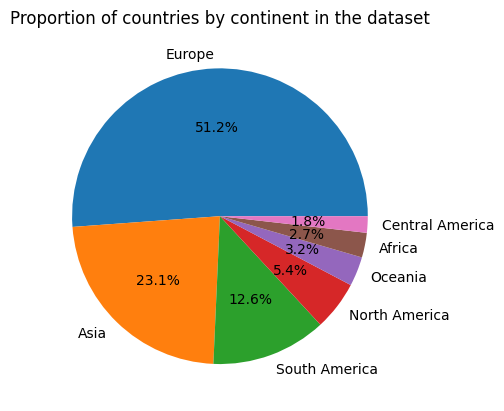

In [48]:
continent_counts = df['Continent'].value_counts()

continent_percentages = continent_counts / df.shape[0] * 100

plt.pie(continent_percentages, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('Proportion of countries by continent in the dataset')
plt.show()

###### Create a bar chart comparing the mean GDP per capita of developed and developing countries

<AxesSubplot: title={'center': 'Average GDP per Capita by Development Status'}, xlabel='Development status'>

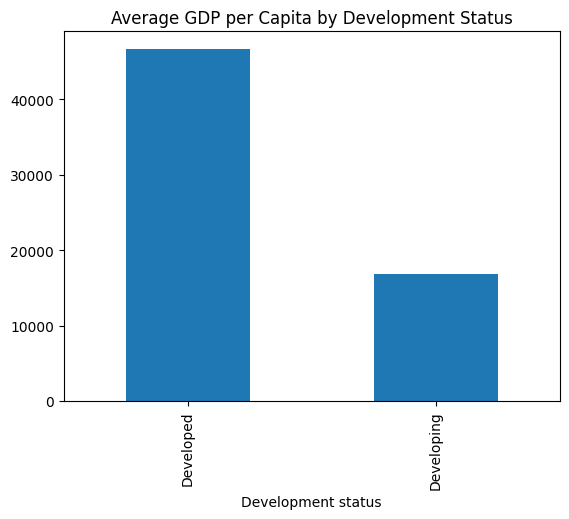

In [50]:
plt.title('Average GDP per Capita by Development Status')

df_status = df[df['Development status'].isin(['Developed', 'Developing'])]

mean_gdp = df_status.groupby('Development status')['GDP per capita (PPP)'].mean()

mean_gdp.plot(kind='bar')

##### Plot trend of GDP per capita over time for developed and developing countries

Text(0, 0.5, 'GDP per capita (PPP)')

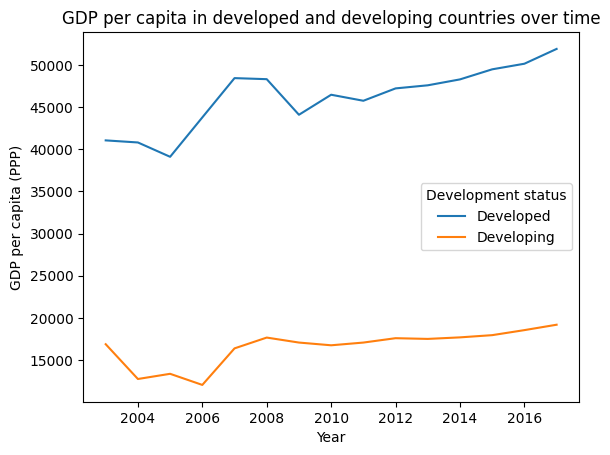

In [52]:
df_gdp_by_dev_status = df.groupby(['Year', 'Development status'])['GDP per capita (PPP)'].mean().reset_index()

sns.lineplot(x='Year', y='GDP per capita (PPP)', hue='Development status', data=df_gdp_by_dev_status)

plt.title('GDP per capita in developed and developing countries over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (PPP)')

##### Create box plot and violin plot of GDP per capita data

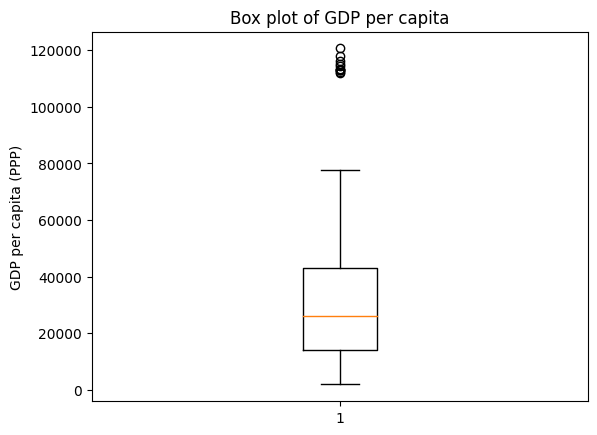

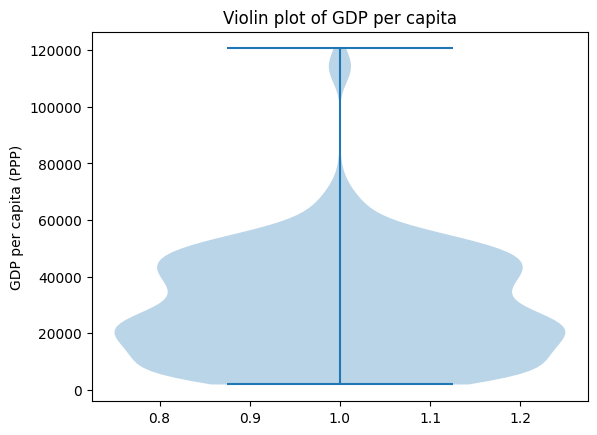

In [53]:
plt.title("Box plot of GDP per capita")
plt.boxplot(df['GDP per capita (PPP)'])
plt.ylabel("GDP per capita (PPP)")
plt.show()

plt.title("Violin plot of GDP per capita")
plt.ylabel("GDP per capita (PPP)")
plt.violinplot(df['GDP per capita (PPP)'])

plt.show()

##### Plot average GDP per capita over time.

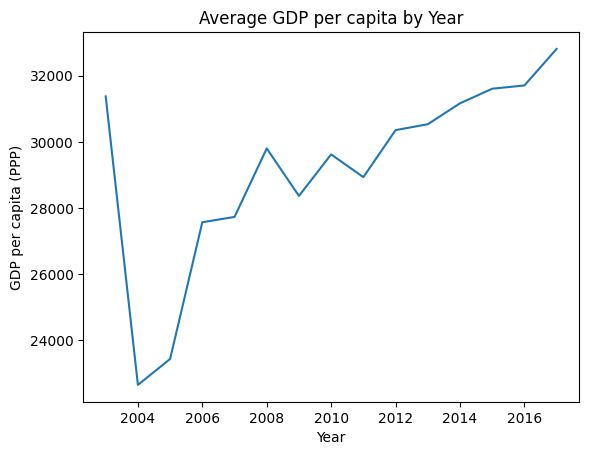

In [54]:
plt.plot(all_years.index, all_years.values)
plt.title('Average GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per capita (PPP)')

plt.show()

# Does a longer work day equate to higher GDP per capita?
##### Correlation between Average Annual Hours Worked and GDP per Capita

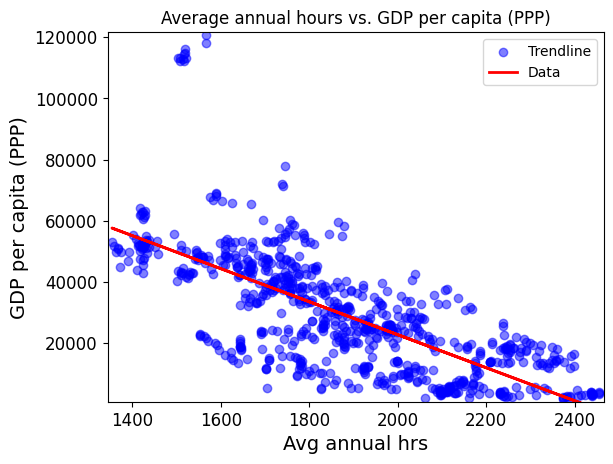

In [59]:
x = df['Avg annual hrs']
y = df['GDP per capita (PPP)']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

trendline = slope * x + intercept

plt.scatter(x, y, marker='o', c='b', alpha=0.5)
plt.plot(x, trendline, 'r-', linewidth=2)

plt.title('Average annual hours vs. GDP per capita (PPP)')
plt.xlabel('Avg annual hrs', fontsize=14)
plt.ylabel('GDP per capita (PPP)', fontsize=14)
plt.legend(['Trendline', 'Data'])

plt.xlim(x.min()-10, x.max()+10)
plt.ylim(y.min()-1000, y.max()+1000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

After analyzing the scatter plot, it appears that there is no clear relationship between the average annual hours worked and the GDP per capita (PPP). Some countries with high average annual hours worked have low GDP per capita, while other countries with low average annual hours worked have high GDP per capita. It is possible that there are other factors influencing the GDP per capita that are not being considered in this analysis. It is also worth noting that the relationship could potentially be reversed, with higher GDP per capita leading to more leisure time and therefore lower average annual hours worked. 

# Does working more lead to a shorter lifespan?
###### Scatterplot showing relationship between average annual hours and life expectancy

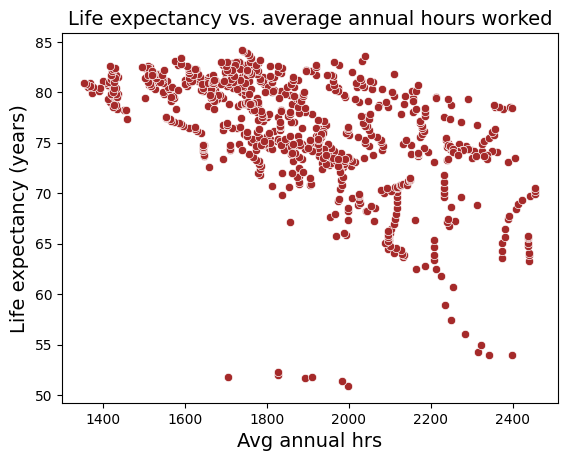

In [79]:
sns.scatterplot(x='Avg annual hrs', y='Life expectancy', data=df, color='brown', marker='o')

plt.title('Life expectancy vs. average annual hours worked', size=14)
plt.xlabel('Avg annual hrs', size=14)
plt.ylabel('Life expectancy (years)', size=14)

plt.show()

##### Investigating the relationship between average annual hours worked and life expectancy

In [72]:
r, p = pearsonr(df['Avg annual hrs'], df['Life expectancy'])

print(f'Pearson correlation coefficient: {r:.2f}')
print(f'p-value: {p:.2f}')

Pearson correlation coefficient: -0.58
p-value: 0.00


A negative correlation coefficient of -0.58 could indicate that countries with higher average annual working hours per worker tend to have lower life expectancy at birth, and vice versa.

also, p-value of the Pearson correlation coefficient is less than 0.05, it indicates that the correlation between the two variables is statistically significant. This means that there is a strong likelihood that the relationship between the variables is not due to chance, and that the variables are correlated in some way.

# Does working more increase the risk of self-harm?

###### A scatter plot showing the relationship between average annual hours worked and self-harm death rates.

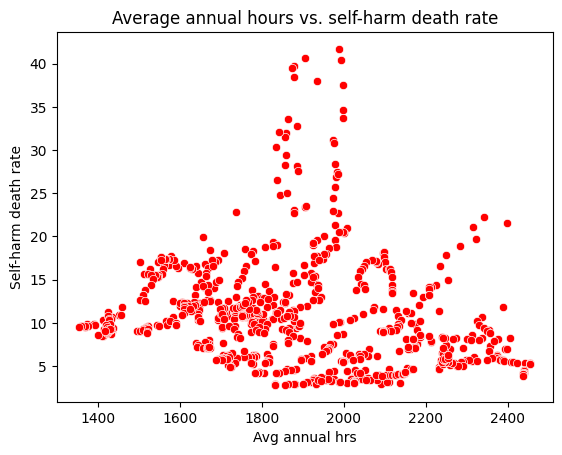

In [82]:
sns.scatterplot(x='Avg annual hrs', y='Self-harm deaths rate', data=df, color='red')

plt.title('Average annual hours vs. self-harm death rate')
plt.xlabel('Avg annual hrs')
plt.ylabel('Self-harm death rate')

plt.show()

Based on the scatterplot, it appears that there is no clear relationship between average annual hours worked and self-harm death rate. The data points are scattered randomly and do not show any clear pattern of correlation. This suggests that other factors, such as mental health, societal support systems, and access to resources, may be more significant in determining the rate of self-harm deaths.

# The darker side of mental health: Is there a link to self-harm?

###### Scatter plot of self-harm deaths rate versus mental disorders percentage

Text(0, 0.5, 'Self-harm deaths rate')

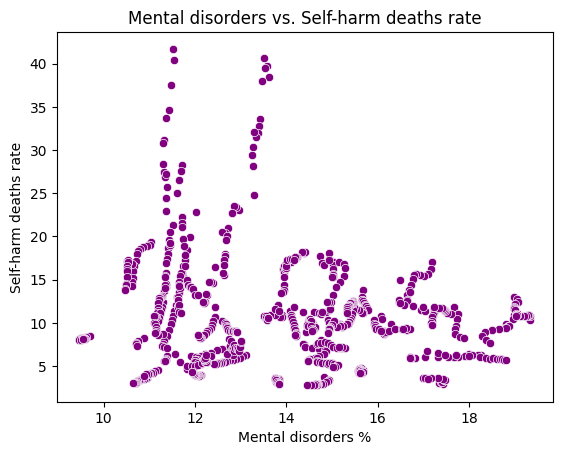

In [88]:
sns.scatterplot(x='Mental disorders %', y='Self-harm deaths rate', data=df, color='purple')

plt.title('Mental disorders vs. Self-harm deaths rate')
plt.xlabel('Mental disorders %')
plt.ylabel('Self-harm deaths rate')

##### Exploring potential correlations between mental disorders and self-harm deaths rate using Pearson correlation

In [86]:
r, p = pearsonr(df['Mental disorders %'], df['Self-harm deaths rate'])

print(r)
print(p)

-0.16368894286587987
4.445931122210004e-06


It looks like there may be a slight negative correlation between mental disorders and self-harm deaths, but let's be real, we all know it's just a coincidence. After all, correlation does not equal causation! In any case, it was fun to run the Pearson correlation coefficient and see what we got. Just remember to always take these results with a grain of salt.

# Money can't buy happiness? Let's see!
##### Scatter plot showing relationship between happiness rate and GDP per capita


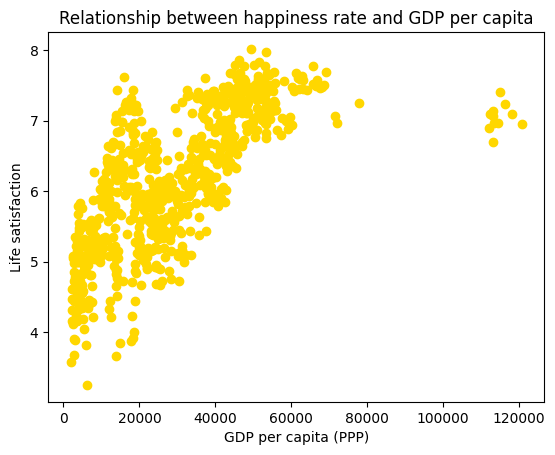

In [91]:
gdp_per_capita = df['GDP per capita (PPP)']
happiness_rate = df['Life satisfaction']

plt.scatter(gdp_per_capita, happiness_rate, color='gold')

plt.xlabel('GDP per capita (PPP)')
plt.ylabel('Life satisfaction')
plt.title('Relationship between happiness rate and GDP per capita')

plt.show()

It appears that there is a relationship between a country's GDP per capita and the life satisfaction of its citizens. While we cannot definitively conclude that higher GDP per capita leads to higher life satisfaction, it is worth further investigation. One possibility is that countries with higher GDP per capita are able to afford better living conditions, healthcare, and education, which could contribute to higher levels of happiness. However, other factors such as social support and personal freedom may also play a role in life satisfaction. It would be interesting to explore these relationships further.

# The jobless blues: does unemployment impact happiness?

###### Scatter plot showing relationship between unemployment rate and life satisfaction

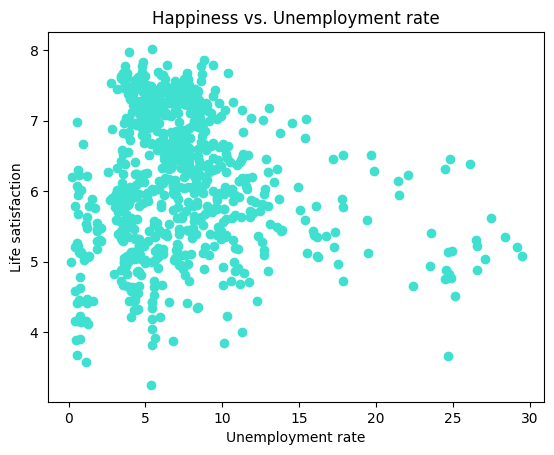

In [98]:
x = df['Unemployment rate']
y = df['Life satisfaction']

plt.scatter(x, y, color='turquoise')
plt.xlabel('Unemployment rate')
plt.ylabel('Life satisfaction')
plt.title('Happiness vs. Unemployment rate')
plt.show()

Based on the scatter plot, there seems to be a negative correlation between unemployment rate and life satisfaction. This means that as the unemployment rate decreases (i.e. more people are employed), life satisfaction tends to increase. This suggests that having a job or being employed may be important for people's overall happiness and well-being. However, it's important to note that this is just a preliminary analysis and more research is needed to fully understand the relationship between unemployment rate and life satisfaction.

# The longer you live, the happier you are?

###### Scatter plot of happiness rate versus life expectancy

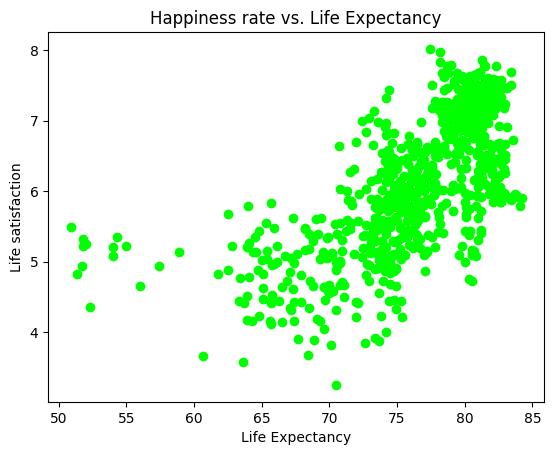

In [100]:
plt.scatter(df['Life expectancy'], df['Life satisfaction'], color='lime')

plt.xlabel('Life Expectancy')
plt.ylabel('Life satisfaction')
plt.title('Happiness rate vs. Life Expectancy')

plt.show()

This scatter plot suggests that there may be a positive correlation between life expectancy and life satisfaction. In other words, people who live longer may also be happier. This is certainly food for thought and a reminder to focus on maintaining our health and well-being in order to potentially increase both the quantity and quality of our lives

# Are we getting more connected over time?
не ну ладно это бред

###### Line chart showing the trend of internet usage over time

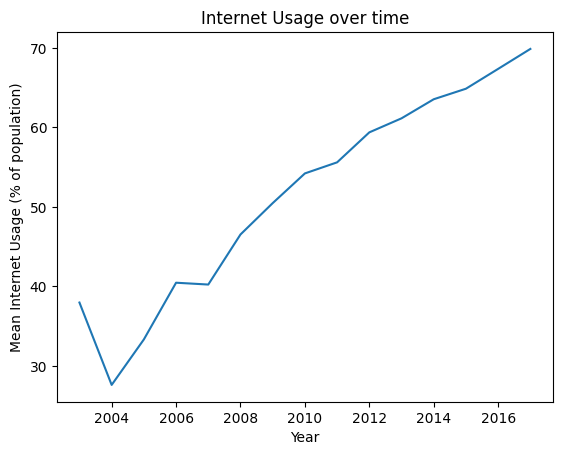

In [101]:
mean_internet_usage_by_year = df.groupby('Year')['Internet use (% of population)'].mean()

plt.plot(mean_internet_usage_by_year)

plt.xlabel('Year')
plt.ylabel('Mean Internet Usage (% of population)')
plt.title('Internet Usage over time')

plt.show()

The line chart shows an upward trend in internet usage over time, indicating that the percentage of the population using the internet has increased over the years. This could be due to the increasing availability and affordability of internet access, as well as the growing importance of the internet in daily life.

## Does being online make you happy?

###### Faceted scatter plot showing relationship between internet usage and happiness over time

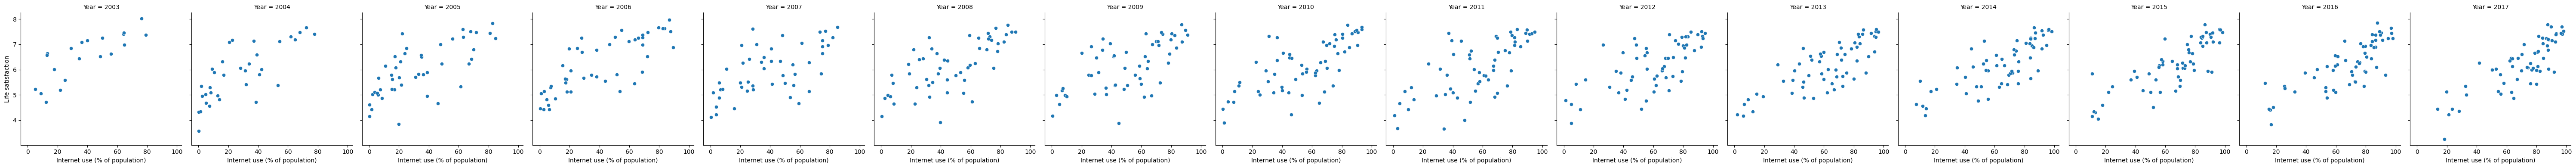

In [102]:
g.fig.suptitle('Relationship between Internet Usage and Happiness over time')


g = sns.FacetGrid(df, col="Year", height=4, aspect=1)
g = g.map(sns.scatterplot, "Internet use (% of population)", "Life satisfaction")

It appears that happiness has been relatively stable over the past few decades, with some slight fluctuations.

# Phone wars: Mobile vs. Fixed, who's winning?

###### Comparison of mobile and fixed telephone subscriptions over time

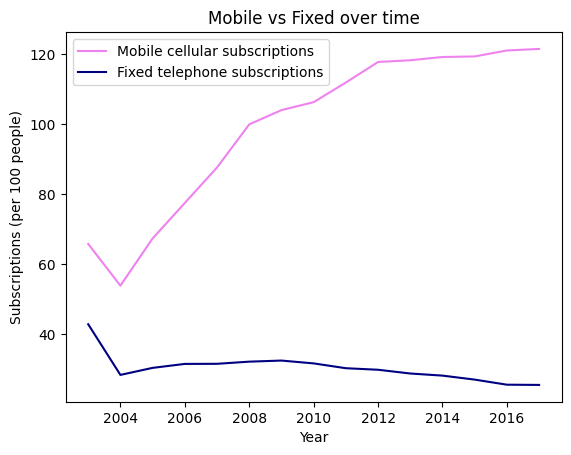

In [110]:
df_subs = df[['Year', 'Mobile cellular subscriptions (per 100 people)', 'Fixed telephone subscriptions (per 100 people)']]
df_subs_mean = df_subs.groupby('Year').mean()

plt.plot(df_subs_mean['Mobile cellular subscriptions (per 100 people)'], color='violet')
plt.plot(df_subs_mean['Fixed telephone subscriptions (per 100 people)'], color='navy')

plt.title('Mobile vs Fixed over time')
plt.xlabel('Year')
plt.ylabel('Subscriptions (per 100 people)')
plt.legend(['Mobile cellular subscriptions', 'Fixed telephone subscriptions'])
plt.show()

It is clear that mobile subscriptions have consistently surpassed fixed subscriptions in terms of popularity. This could be due to the increasing affordability and convenience of mobile phones, as well as the advancement of mobile technology.

# The great divide: Developed vs Developing countries' work hours

###### Comparison of average annual hours worked in developed and developing countries

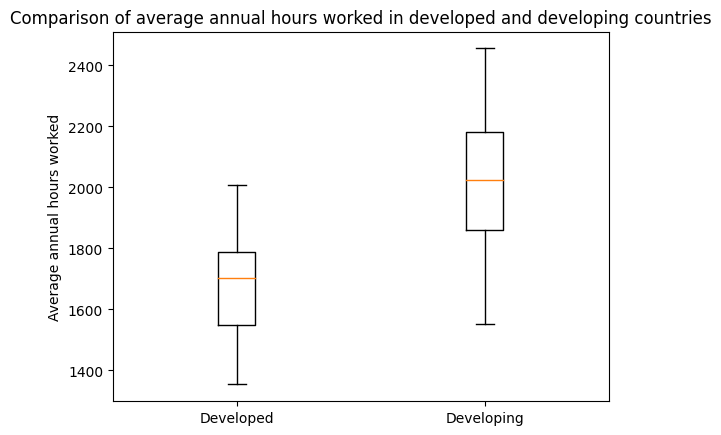

In [115]:
developed_hours = df[df['Development status'] == 'Developed']['Avg annual hrs']
developing_hours = df[df['Development status'] == 'Developing']['Avg annual hrs']

plt.boxplot([developed_hours, developing_hours])
plt.xticks([1, 2], ['Developed', 'Developing'])
plt.ylabel('Average annual hours worked')
plt.title('Comparison of average annual hours worked in developed and developing countries')
plt.show()

Text(0.5, 1.0, 'Life Expectancy Comparison between Developed and Developing Countries')

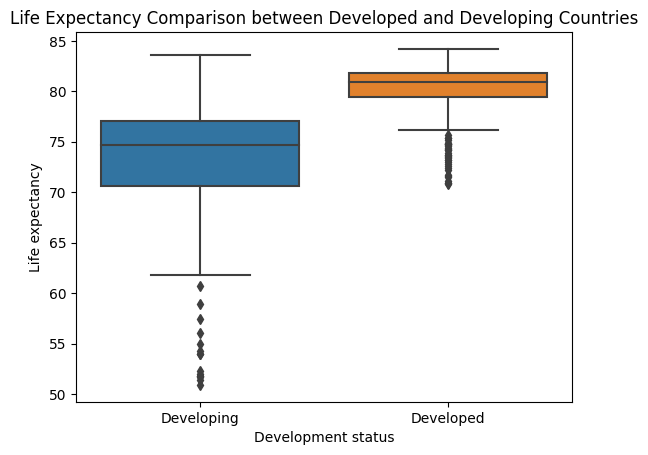

In [107]:
sns.boxplot(x='Development status', y='Life expectancy', data=df)
plt.title('Life Expectancy Comparison between Developed and Developing Countries')

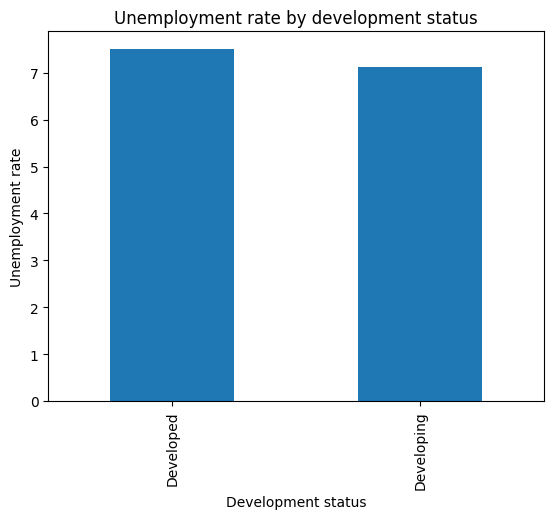

In [120]:
# Group the data by development status and calculate the mean unemployment rate for each group
df_unemployment = df.groupby('Development status')['Unemployment rate'].mean()

# Create a bar chart to compare the unemployment rate between developed and developing countries
df_unemployment.plot(kind='bar')
plt.title('Unemployment rate by development status')
plt.xlabel('Development status')
plt.ylabel('Unemployment rate')
plt.show()

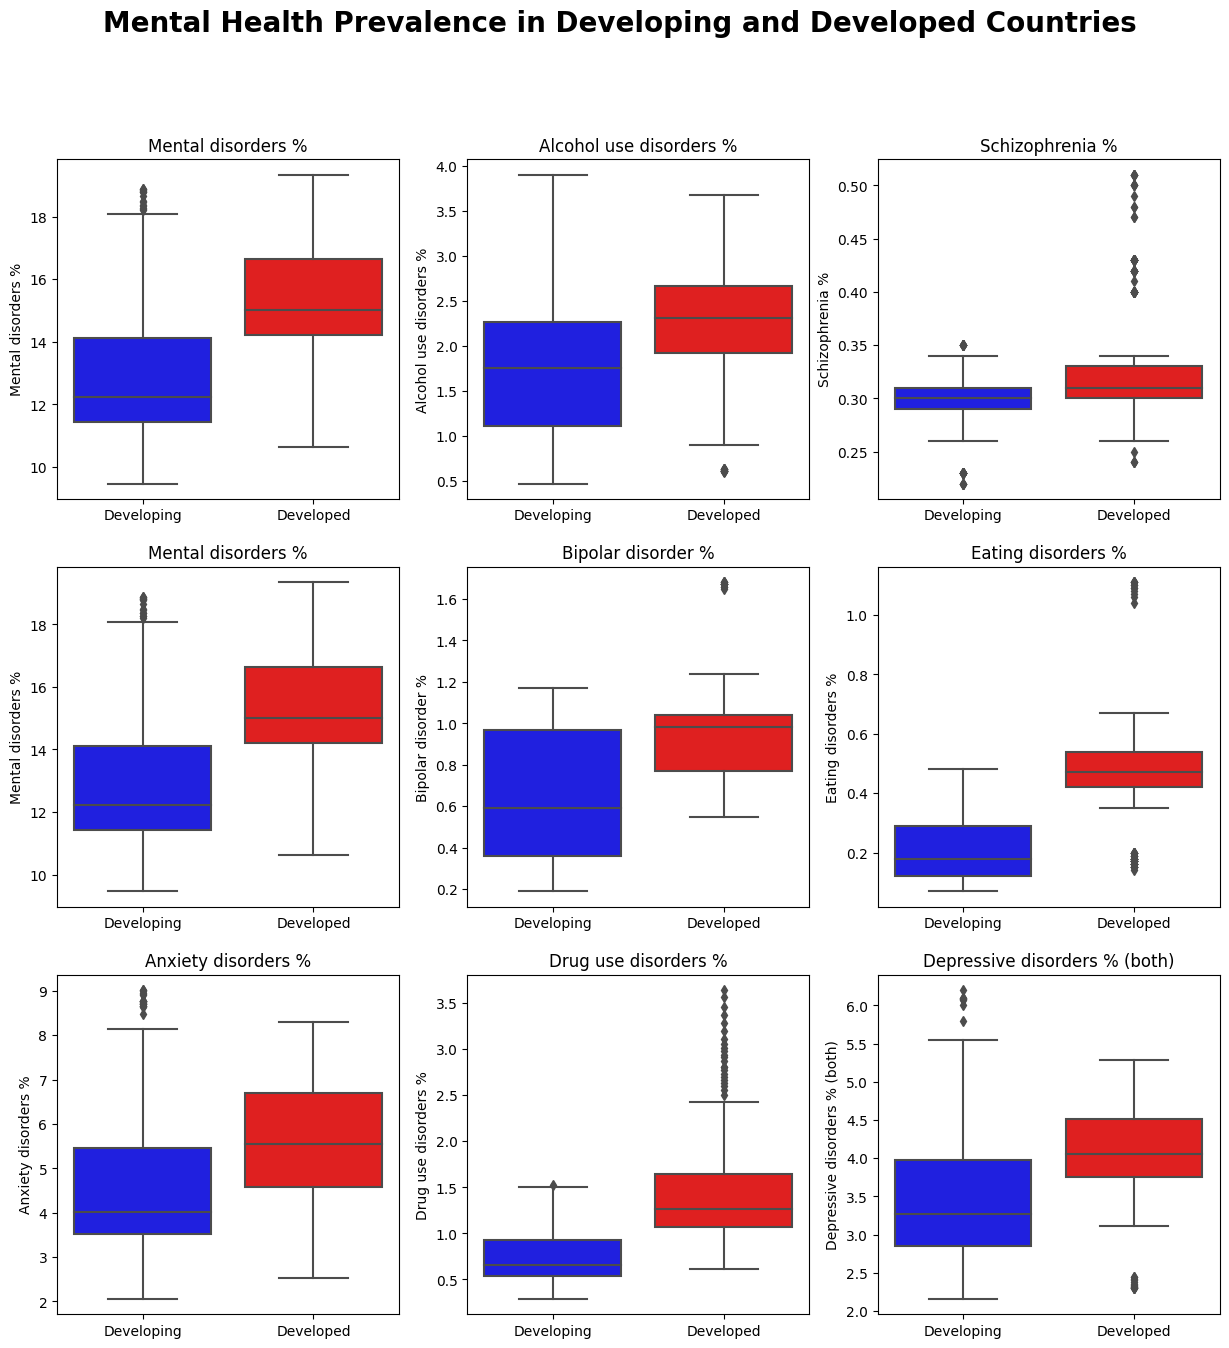

In [37]:
# Set up the plots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Loop through each variable
for i, var in enumerate(['Mental disorders %', 'Alcohol use disorders %', 'Schizophrenia %', 'Mental disorders %', 'Bipolar disorder %', 'Eating disorders %', 'Anxiety disorders %', 'Drug use disorders %', 'Depressive disorders % (both)']):
    # Select the axis for the current variable
    ax = axs[i // 3, i % 3]
    
    # Plot the boxplot with different colors for developed and developing countries
    sns.boxplot(x='Development status', y=var, data=df, palette=['b', 'r'], ax=ax)
    
    # Add a title to the plot
    ax.set_title(var)
    
    
# Remove x-axis label for all plots
for ax in axs.flatten():
    ax.set_xlabel('')
    
# Set the title
fig.suptitle('Mental Health Prevalence in Developing and Developed Countries', fontsize=20, weight='bold')

# Show the plot
plt.show()

In the plots showing the prevalence of various mental health disorders, it is clear that developed countries generally have higher percentages compared to developing countries. For example, in the plot for schizophrenia, developed countries have a higher percentage of the population affected by this disorder, while in the plot for eating disorder, the difference in prevalence between developed and developing countries is even more pronounced. This suggests that mental health disorders may be more prevalent in developed countries, potentially due to a variety of factors such as higher levels of stress and pressure, access to healthcare, and other socio-economic factors. Further research is needed to confirm and understand these trends.

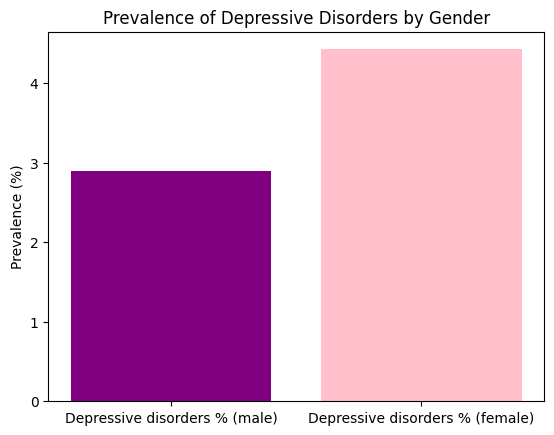

In [38]:
# Create a new dataframe with the male and female prevalence columns
df_depressive_disorders = df[['Depressive disorders % (male)', 'Depressive disorders % (female)']]

# Calculate the mean values for each column
df_mean = df_depressive_disorders.mean()

# Create the bar chart
plt.bar(df_mean.index, df_mean.values, color=['purple', 'pink'])

# Add a title and axis labels
plt.title('Prevalence of Depressive Disorders by Gender')
plt.ylabel('Prevalence (%)')

# Show the plot
plt.show()


Based on the data, it appears that females have a higher mean percentage of depressive disorders compared to males. Specifically, the mean percentage of depressive disorders among females is 4.5%, while the mean percentage among males is slightly less than 3%. This suggests that females may be more prone to experiencing depressive disorders than males. It is important to consider this finding when developing interventions and strategies for addressing mental health issues within populations.

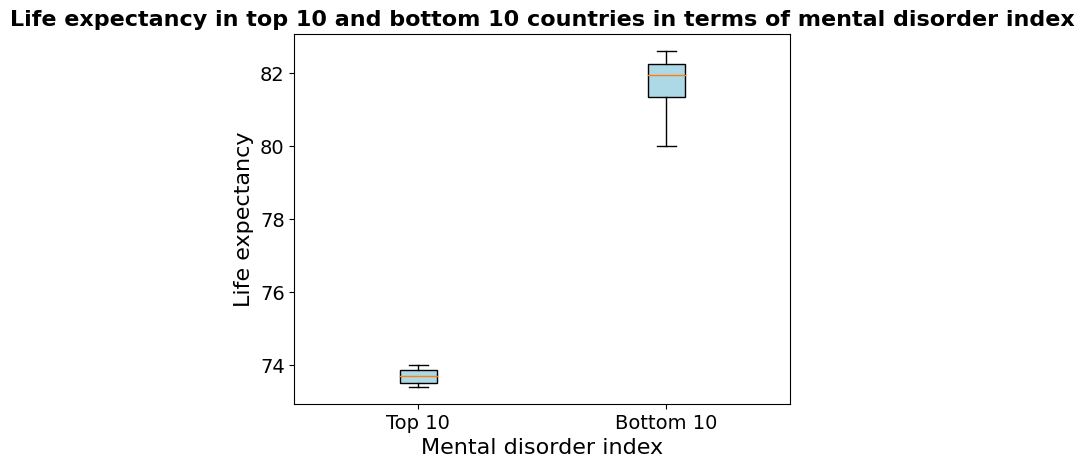

In [39]:
# Sort the dataframe by mental disorder index in ascending order
df_sorted = df.sort_values(by='Mental disorders %')

# Take the top 10 and bottom 10 countries in terms of mental disorder index
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Extract the life expectancy values for the top 10 and bottom 10 countries
top_10_life_expectancy = top_10['Life expectancy']
bottom_10_life_expectancy = bottom_10['Life expectancy']

# Visualize the comparison using a box plot
plt.boxplot([top_10_life_expectancy, bottom_10_life_expectancy], 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            flierprops=dict(color='black', marker='D'))

plt.title('Life expectancy in top 10 and bottom 10 countries in terms of mental disorder index', fontsize=16, fontweight='bold')
plt.xlabel('Mental disorder index', fontsize=16)
plt.ylabel('Life expectancy', fontsize=16)
plt.xticks([1, 2], ['Top 10', 'Bottom 10'], fontsize=14)
plt.yticks(fontsize=14)
plt.show()


The boxplot above compares the life expectancy of the top 10 countries with the highest mental disorder percentage and the bottom 10 countries with the lowest mental disorder percentage. It can be seen that the median life expectancy for the top 10 countries is higher than the median life expectancy for the bottom 10 countries. This suggests that there may be a positive relationship between mental disorder percentage and life expectancy, where countries with higher mental disorder percentages tend to have higher life expectancy. However, it is important to note that this relationship may not be causal and could be influenced by other factors such as healthcare quality or socio-economic conditions. Further analysis would be needed to confirm the nature of this relationship.

## Luxembourg - в конец 

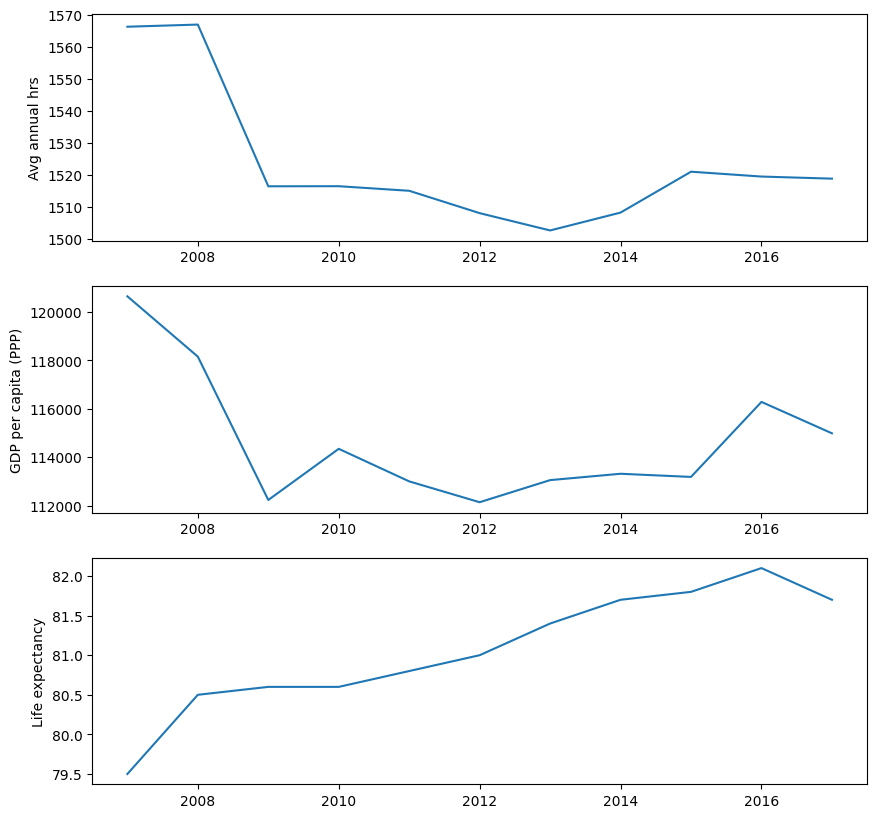

In [40]:
# Select the rows for Luxembourg
luxembourg = df[df['Country'] == 'Luxembourg']

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot the 'Avg annual hrs' variable in the first subplot
axs[0].plot(luxembourg['Year'], luxembourg['Avg annual hrs'])
axs[0].set_ylabel('Avg annual hrs')

# Plot the 'GDP per capita (PPP)' variable in the second subplot
axs[1].plot(luxembourg['Year'], luxembourg['GDP per capita (PPP)'])
axs[1].set_ylabel('GDP per capita (PPP)')

# Plot the 'Life expectancy' variable in the third subplot
axs[2].plot(luxembourg['Year'], luxembourg['Life expectancy'])
axs[2].set_ylabel('Life expectancy')

# Show the plot
plt.show()